                                         # Predicting_Diabetes_with_Logistic_Regression                                                                     

## Predicting_Diabetes_with_Logistic_Regression 

This project involves using logistic regression to predict the likelihood of diabetes in individuals based on various health metrics. The dataset used for this analysis is the Pima Indians Diabetes Database, which contains information such as age, BMI, blood pressure, and glucose levels.


## Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Load The Dataset

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/diabetes.csv")

# Explore The Dataset

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



Check for the null values

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

row and column count

In [7]:
df.shape

(100000, 9)

In [8]:
# Check for duplicate values 
df.duplicated().sum()

np.int64(3854)

as there is duplicate values in the dataset we have to remove them

In [35]:
df=df.drop_duplicates()

In [10]:
df.shape

(96146, 9)

In [11]:
df.duplicated().sum()

np.int64(0)

# Analysis and Visualization

In [12]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


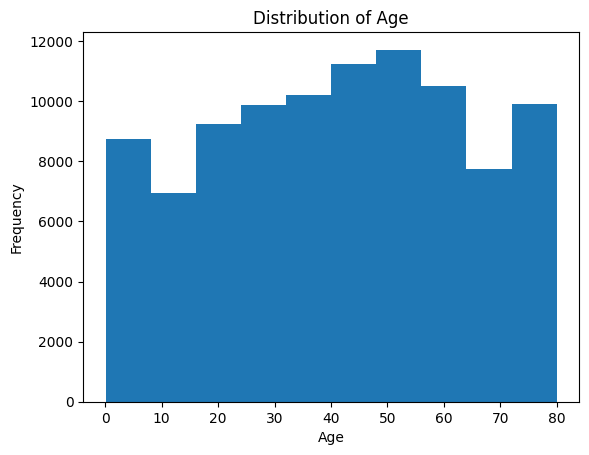

In [13]:
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [14]:
# # plot a bar chart for gender and bmi
# plt.bar(df['gender'], df['bmi'])
# plt.xlabel('Gender')
# plt.ylabel('BMI')
# plt.title('BMI by Gender')
# plt.show()

# Train The model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [37]:
from sklearn import metrics

In [38]:
# Encode categorical variables before splitting the data
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['smoking_history'] = le_smoking.fit_transform(df['smoking_history'])

print("Categorical variables encoded successfully!")
df[['gender','smoking_history']].head()

Categorical variables encoded successfully!


,gender,smoking_history
0,0,4
1,0,0
2,1,4
3,0,1
4,1,1


In [39]:
train, test = train_test_split(df, test_size=0.25)
print("Train Size: ", train.shape)
print("Test Size: ", test.shape)


Train Size:  (72109, 9)
Test Size:  (24037, 9)


In [40]:
train_x = train.drop(columns=['diabetes'])
train_y = train['diabetes']

test_x = test.drop(columns=['diabetes'])
test_y = test['diabetes']

In [19]:
train_x.shape

(72109, 8)

In [20]:
test_y.shape

(24037,)

In [21]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((72109, 8), (72109,), (24037, 8), (24037,))

# Model Evalution

In [22]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


In [23]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0
99999,0,57.0,0,0,1,22.43,6.6,90,0


In [41]:

model = LogisticRegression(max_iter=500)
model.fit(train_x, train_y)

pred = model.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(pred, test_y)*100)

Accuracy:  95.72325997420643


In [26]:
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [29]:
pred=model.predict([[0,80,0,1,4,25.19,6.6,140]]) # Fill values in the list to predict
print("Prediction is : ", pred[0])

Prediction is :  0


C:\Users\PANDIT JI\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(test_y, pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
cr = classification_report(test_y, pred)
print(cr)

Confusion Matrix:
[[21683   219]
 [  809  1326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21902
           1       0.86      0.62      0.72      2135

    accuracy                           0.96     24037
   macro avg       0.91      0.81      0.85     24037
weighted avg       0.95      0.96      0.95     24037



In [43]:
# F1 score , precision, recall, accuracy
f1 = f1_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
accuracy = accuracy_score(test_y, pred)

print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)

F1 Score:  0.7206521739130435
Precision:  0.858252427184466
Recall:  0.6210772833723653
Accuracy:  0.9572325997420643


# Save The Model

In [44]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')
print("Model saved as diabetes_model.pkl")

Model saved as diabetes_model.pkl


# By: Lucky Sharma